In [1]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.models import load_model

/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# Get the stock quote
df = web.DataReader("NKE", data_source="yahoo", start="2012-01-01", end="2020-10-20")
# Show the data
df[0:10]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.497499,24.174999,24.342501,24.202499,10944400.0,19.917757
2012-01-04,24.687500,24.127501,24.177500,24.555000,9440800.0,20.207851
2012-01-05,24.645000,24.250000,24.447500,24.540001,8393200.0,20.195511
2012-01-06,24.625000,24.379999,24.482500,24.497499,7760800.0,20.160526
2012-01-09,24.732500,24.424999,24.525000,24.587500,10045600.0,20.234600
2012-01-10,24.732500,24.420000,24.707500,24.617500,9812400.0,20.259283
2012-01-11,24.650000,24.447500,24.567499,24.535000,7002800.0,20.191389
2012-01-12,24.785000,24.434999,24.572500,24.775000,7516400.0,20.388901
2012-01-13,24.732500,24.510000,24.597500,24.575001,6534000.0,20.224310


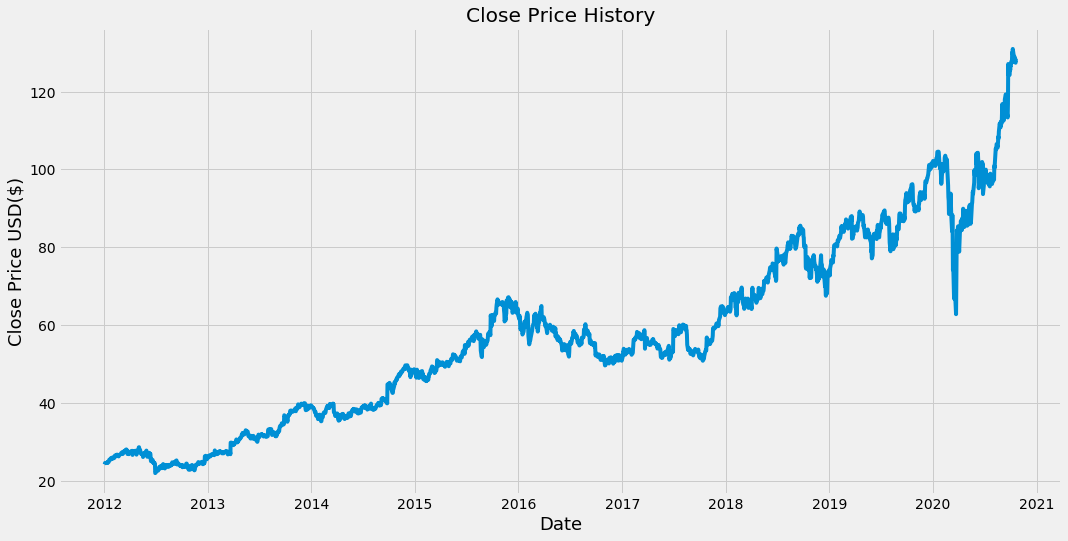

In [3]:
# Visualize the closing price history
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.savefig("Close Price History.png")
plt.show()

In [4]:
# Create a new dataframe with only the "Close" column
data = df.filter(["Close"])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)  # 取其中的8/10以组成训练集
print("The size of training set: ", training_data_len)

The size of training set:  1772


In [5]:
# Scale the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

In [6]:
# Create the training dataset
train_data = scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(1712, 60, 1)
(1712,)


In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [8]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [9]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)
# 载入已经训练好的模型
#model = load_model("Stock Price Prediction Using LSTM_model.h5")

Epoch 1/2
1712/1712 [==============================] - 229s 134ms/step - loss: 7.2094e-04
Epoch 2/2
1712/1712 [==============================] - 206s 120ms/step - loss: 2.9064e-04


In [10]:
# Create the test data set
test_data = scaled_data[training_data_len-60:, :]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) 
x_test = np.array(x_test)

In [11]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
# Get the model's predicted price
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)
predictions

array([[ 77.75382 ],
       [ 78.61624 ],
       [ 79.42389 ],
       [ 79.96579 ],
       [ 80.273605],
       [ 80.46678 ],
       [ 80.51539 ],
       [ 80.49314 ],
       [ 80.703415],
       [ 81.08944 ],
       [ 81.37403 ],
       [ 81.676254],
       [ 82.11265 ],
       [ 82.459465],
       [ 82.626274],
       [ 82.68931 ],
       [ 83.00353 ],
       [ 83.561035],
       [ 84.22602 ],
       [ 84.602905],
       [ 84.95212 ],
       [ 85.01766 ],
       [ 85.03988 ],
       [ 84.84407 ],
       [ 84.82075 ],
       [ 84.96217 ],
       [ 85.280365],
       [ 85.672554],
       [ 85.89817 ],
       [ 86.34259 ],
       [ 86.397514],
       [ 86.271675],
       [ 86.04528 ],
       [ 85.87677 ],
       [ 85.67228 ],
       [ 85.74974 ],
       [ 85.81792 ],
       [ 85.9894  ],
       [ 86.36713 ],
       [ 86.7012  ],
       [ 87.1694  ],
       [ 87.526146],
       [ 87.52323 ],
       [ 87.7013  ],
       [ 86.557274],
       [ 85.322075],
       [ 84.59803 ],
       [ 84.1

In [13]:
# Get the root mean squared error
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

2.7725723359271597

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


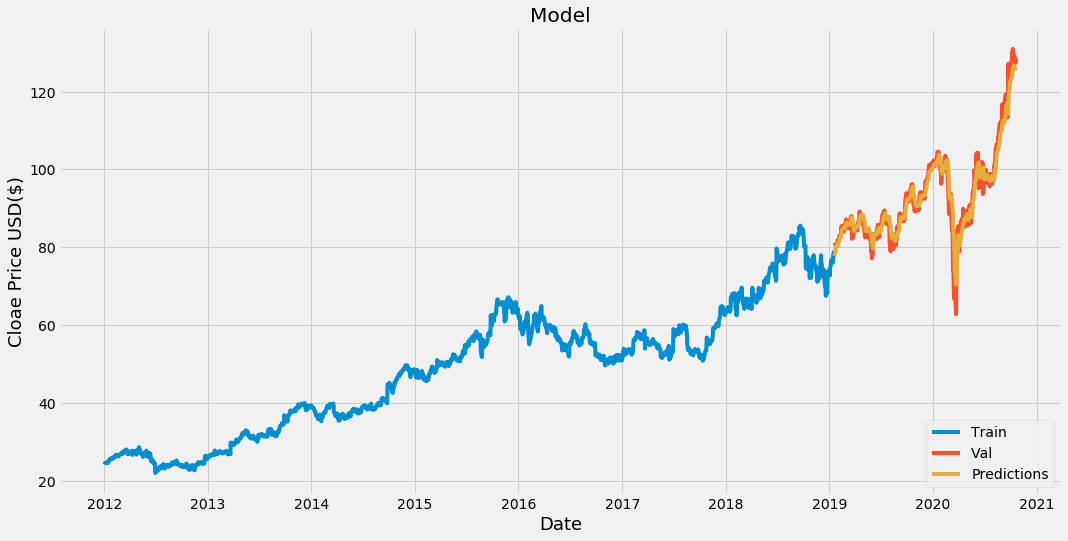

In [14]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Cloae Price USD($)", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc="lower right")
plt.savefig("Model.png")
plt.show()